
# Titanic - Machine Learning Project

Group 1: Fernanda Garcia, Gabriela Brogim, Isabella Nascimento e Julia Duó

# Contents 

1.   Download the data
2.   General Information
3.   Data Preparation and Featuring Engeneering


> 3.1 Variable Cabin

> 3.2 Variable Age 

> 3.3 Variable Name

> 3.4 Variable Embarked 



4.   Outliers 
5.   Correlation Matrix 
6.   Data Visualization
7.   Preparing to run the Models 
8.   Decision Tree 
9.   Random Forest 
10.  Adaboosting 
11.  Insights and Results 
12.  Conclusion




















# ***

# Section 1 - Download the Data

Here you can find the original data and challenge: https://www.kaggle.com/c/titanic/data

In [ ]:
# First, we will load all the necessary libraries and packages to run our 
# analysis. 

import seaborn as sns
import pandas as pd
import numpy as np

import matplotlib.pyplot as plt
import graphviz
import pprint

from sklearn import tree as sk_tree
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import confusion_matrix, classification_report
from sklearn.metrics import median_absolute_error, mean_absolute_error, r2_score, max_error, explained_variance_score
from sklearn.model_selection import train_test_split
from sklearn.impute import SimpleImputer

import io

In [ ]:
# Now, we will upload the dataset 

from google.colab import files

uploaded = files.upload()

titanic_df = pd.read_csv(io.BytesIO(uploaded['train.csv']))

titanic_df.head()
titanic_df.info()
type(titanic_df)

Saving train.csv to train (3).csv
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


pandas.core.frame.DataFrame

In [ ]:
# Lets first take a look at the shape of our data 

titanic_df.shape

(891, 12)

In [ ]:
# Splitting the dataset into train, validation and test

train_df, test_df = train_test_split(titanic_df, test_size = 0.3, random_state = 7)
train_df, val_df = train_test_split(train_df, test_size = 0.3, random_state = 7)


In [ ]:
# Checking for the size of our new datasets and if our splitting code worked 

# This step is important to see if the matrix that we will build to test the models 
# is correct

# Train dataset shape 
train_df.shape

(436, 12)

In [ ]:
# Validation dataset shape
val_df.shape

(187, 12)

In [ ]:
# Test dataset shape
test_df.shape

(268, 12)

In [ ]:
# Now, we will concat these dataframes in one (df) so we can apply all the transformations 
# at the same time to all the dataframes 

df = pd.concat((train_df.loc[:,'Pclass':'Embarked'],
                val_df.loc[:, 'Pclass':'Embarked'],
                   test_df.loc[:,'Pclass':'Embarked']))


In [ ]:
# Checking if everything went well when concating the data 

df.shape

(891, 10)

# Section 2 - General Information

In [ ]:
# Lets see how the dataframe looks like and get a view from its 5 observations 

df.head()

,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
368,3,"Jermyn, Miss. Annie",female,NaN,0,0,14313,7.75,NaN,Q
339,1,"Blackwell, Mr. Stephen Weart",male,45.0,0,0,113784,35.50,T,S
864,2,"Gill, Mr. John William",male,24.0,0,0,233866,13.00,NaN,S
672,2,"Mitchell, Mr. Henry Michael",male,70.0,0,0,C.A. 24580,10.50,NaN,S
506,2,"Quick, Mrs. Frederick Charles (Jane Richards)",female,33.0,0,2,26360,26.00,NaN,S


In [ ]:
# Now, lets get a look at the columns that we have our disposal 

df.columns

Index(['Pclass', 'Name', 'Sex', 'Age', 'SibSp', 'Parch', 'Ticket', 'Fare',
       'Cabin', 'Embarked'],
      dtype='object')

In [ ]:
# Checking some initial statistics 

df.describe()

,Pclass,Age,SibSp,Parch,Fare
count,891.000000,714.000000,891.000000,891.000000,891.000000
mean,2.308642,29.699118,0.523008,0.381594,32.204208
std,0.836071,14.526497,1.102743,0.806057,49.693429
min,1.000000,0.420000,0.000000,0.000000,0.000000
25%,2.000000,20.125000,0.000000,0.000000,7.910400
50%,3.000000,28.000000,0.000000,0.000000,14.454200
75%,3.000000,38.000000,1.000000,0.000000,31.000000
max,3.000000,80.000000,8.000000,6.000000,512.329200


In [ ]:
# Checking the type of the variables available for our analysis 

# This step is important because all variables that are categorical will have to go 
# through enconding so the algoritim can read it 

df.dtypes

Pclass        int64
Name         object
Sex          object
Age         float64
SibSp         int64
Parch         int64
Ticket       object
Fare        float64
Cabin        object
Embarked     object
dtype: object

In [ ]:
# First, we dropped the variable Name because we did not see any information that could
# be extracted. After the first presentation and the comments made by the professor and 
# our colleagues, we tried to see if there was any lasting information in Name that we
# could use to improve our estimator. 

# Thus, we want to check if there is any patern that can be explored in Name. 
# Lets check the observations in this variable.

df['Name'].unique()

# After a quick look, we can see that profession might be an information that we can 
# take our of Name only if we can select the information between "," and ".". 
# This will be addressed in Section 3.3.

array(['Jermyn, Miss. Annie', 'Blackwell, Mr. Stephen Weart',
       'Gill, Mr. John William', 'Mitchell, Mr. Henry Michael',
       'Quick, Mrs. Frederick Charles (Jane Richards)',
       'Ford, Miss. Doolina Margaret "Daisy"', 'McGovern, Miss. Mary',
       'Stranden, Mr. Juho', 'Brown, Mrs. James Joseph (Margaret Tobin)',
       'Palsson, Master. Gosta Leonard',
       'Goldsmith, Mrs. Frank John (Emily Alice Brown)',
       'Andrew, Mr. Edgardo Samuel', 'Andreasson, Mr. Paul Edvin',
       'Braund, Mr. Lewis Richard', 'Padro y Manent, Mr. Julian',
       'Levy, Mr. Rene Jacques', 'Rice, Mrs. William (Margaret Norton)',
       'Hickman, Mr. Lewis', 'Fortune, Mr. Mark',
       'Frolicher, Miss. Hedwig Margaritha',
       'Gustafsson, Mr. Karl Gideon', 'Goodwin, Master. Sidney Leonard',
       'Nankoff, Mr. Minko', 'Davies, Mr. Alfred J',
       'Hansen, Mr. Henry Damsgaard', 'Karun, Miss. Manca',
       'Renouf, Mrs. Peter Henry (Lillian Jefferys)',
       'Hocking, Mr. Richard Georg

In [ ]:
# Following the rationale used to study Name, we do the same thing for Cabin.

df['Cabin'].unique()

array([nan, 'T', 'B4', 'D', 'C23 C25 C27', 'B39', 'E34', 'D11', 'C90',
       'B80', 'B20', 'F G63', 'C82', 'B57 B59 B63 B66', 'B35', 'A34',
       'B101', 'A5', 'F G73', 'F2', 'E63', 'E50', 'B51 B53 B55', 'D7',
       'F33', 'C86', 'C22 C26', 'C93', 'C85', 'C49', 'C123', 'C65', 'D35',
       'C46', 'E10', 'B96 B98', 'E44', 'C118', 'C78', 'D17', 'C124',
       'B42', 'E33', 'D36', 'D37', 'B77', 'E38', 'G6', 'E58', 'B94',
       'C95', 'F4', 'B5', 'A20', 'D20', 'E101', 'C126', 'C7', 'E77',
       'E24', 'D6', 'A24', 'E25', 'C91', 'B82 B84', 'B58 B60', 'A19',
       'D48', 'E46', 'B41', 'B22', 'A6', 'E8', 'B3', 'E67', 'C54', 'D26',
       'B71', 'C52', 'C87', 'C99', 'A26', 'C101', 'E17', 'C83', 'A32',
       'B19', 'A36', 'B69', 'E31', 'E12', 'C47', 'C125', 'B102', 'D56',
       'B18', 'A10', 'B78', 'E68', 'C106', 'D47', 'A7', 'C32', 'E36',
       'C2', 'C68', 'A14', 'B49', 'C92', 'C70', 'B86', 'E121', 'D33',
       'C103', 'E40', 'B73', 'B38', 'D9', 'C50', 'D49', 'A23', 'B28',
       'C

In [ ]:
# Following the rationale used to study Name, we do the same thing for Ticket.

df['Ticket'].unique()

array(['14313', '113784', '233866', 'C.A. 24580', '26360', 'W./C. 6608',
       '330931', 'STON/O 2. 3101288', 'PC 17610', '349909', '363291',
       '231945', '347466', '3460', 'SC/PARIS 2146', 'SC/Paris 2163',
       '382652', 'S.O.C. 14879', '19950', '13568', '347069', 'CA 2144',
       '349218', 'A/4 48871', '350029', '349256', '31027', '29104',
       '2700', '2686', '2699', '244252', '349223', '330932', '345764',
       '16966', 'A4. 54510', '312991', '13502', '237798', '350035',
       'PC 17482', 'C 4001', 'PC 17569', 'SOTON/O.Q. 3101310', '371110',
       '17474', '111426', '348121', 'PC 17600', '4133', 'CA. 2343',
       'F.C.C. 13529', '349203', '350046', '244361', 'A./5. 3235',
       '370370', 'C.A. 34651', 'PC 17757', '343095', '250647', '36864',
       'W./C. 6609', '384461', '347067', '3101298', 'A/5. 3337', '1601',
       '250652', '367229', '364851', '349237', 'C.A. 31921', '244358',
       '111428', '113503', '349219', '349241', 'PC 17608', '250646',
       'PC 17477

# ***

# Section 3 - Data Preparation and Feature Engeneering 

### Missing Values

In [ ]:
# Lest first check for missing values in our dataset, visualizing the percentage 
# of NaN in each variable. 

total = df.isnull().sum().sort_values(ascending=False)
percent = (df.isnull().sum()/df.isnull().count()*100).sort_values(ascending=False)
missing_data = pd.concat([total, percent], axis=1, keys=['Total', 'Percent'])
missing_data.head(20)

,Total,Percent
Cabin,687,77.104377
Age,177,19.865320
Embarked,2,0.224467
Pclass,0,0.000000
Name,0,0.000000
Sex,0,0.000000
SibSp,0,0.000000
Parch,0,0.000000
Ticket,0,0.000000
Fare,0,0.000000


In [ ]:
df.isnull()

,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
368,False,False,False,True,False,False,False,False,True,False
339,False,False,False,False,False,False,False,False,False,False
864,False,False,False,False,False,False,False,False,True,False
672,False,False,False,False,False,False,False,False,True,False
506,False,False,False,False,False,False,False,False,True,False
...,...,...,...,...,...,...,...,...,...,...
347,False,False,False,True,False,False,False,False,True,False
218,False,False,False,False,False,False,False,False,False,False
239,False,False,False,False,False,False,False,False,True,False
491,False,False,False,False,False,False,False,False,True,False


Checking missing values by survival

In [ ]:
# This code is from our previous version where we would check for missing 
# values in Survived. However, when concating the data the dependent variable
# must be excluded and thus this code does not run anymore. 

# train_df.set_index('Survived').isna().groupby(level=0).sum()

# fazer essa visu depois!

## Variable Cabin 

Here we will do all the necessary transformations in the variable Cabin.

In [ ]:
df['Cabin'].fillna('No Cabin', inplace = True)
df['Cabin'].unique()

array(['No Cabin', 'T', 'B4', 'D', 'C23 C25 C27', 'B39', 'E34', 'D11',
       'C90', 'B80', 'B20', 'F G63', 'C82', 'B57 B59 B63 B66', 'B35',
       'A34', 'B101', 'A5', 'F G73', 'F2', 'E63', 'E50', 'B51 B53 B55',
       'D7', 'F33', 'C86', 'C22 C26', 'C93', 'C85', 'C49', 'C123', 'C65',
       'D35', 'C46', 'E10', 'B96 B98', 'E44', 'C118', 'C78', 'D17',
       'C124', 'B42', 'E33', 'D36', 'D37', 'B77', 'E38', 'G6', 'E58',
       'B94', 'C95', 'F4', 'B5', 'A20', 'D20', 'E101', 'C126', 'C7',
       'E77', 'E24', 'D6', 'A24', 'E25', 'C91', 'B82 B84', 'B58 B60',
       'A19', 'D48', 'E46', 'B41', 'B22', 'A6', 'E8', 'B3', 'E67', 'C54',
       'D26', 'B71', 'C52', 'C87', 'C99', 'A26', 'C101', 'E17', 'C83',
       'A32', 'B19', 'A36', 'B69', 'E31', 'E12', 'C47', 'C125', 'B102',
       'D56', 'B18', 'A10', 'B78', 'E68', 'C106', 'D47', 'A7', 'C32',
       'E36', 'C2', 'C68', 'A14', 'B49', 'C92', 'C70', 'B86', 'E121',
       'D33', 'C103', 'E40', 'B73', 'B38', 'D9', 'C50', 'D49', 'A23',
       'B

In [ ]:
# Para investigar as diferenças entre NaN em Age e Cabin 

# Começamos criando uma coluna que indica se o valor é missing value ou não

# Vamos começar criando uma para Cabin:

#df2['Cabin'] =  np.where(
    #df2['Cabin'] > upper_limit,
        #upper_limit,
        #np.where(
            #df2['SibSp'] < lower_limit, # Condition
            #lower_limit,                   # Assign If TRUE
            #df2['SibSp']                # Assign If FALSE
#   )
#      )

#sos = pd.cut(df2.Cabin, bins=[], labels=["Missing", "Toddler","Child","Adult","Elderly"])
#df2.insert(5,'age_group', category)

dummy_cabin =  np.where(df['Cabin']!= "No Cabin" , 1, 0)
df.insert(5,'Dummy_Cabin', dummy_cabin)


In [ ]:
df

,Pclass,Name,Sex,Age,SibSp,Dummy_Cabin,Parch,Ticket,Fare,Cabin,Embarked
368,3,"Jermyn, Miss. Annie",female,NaN,0,0,0,14313,7.7500,No Cabin,Q
339,1,"Blackwell, Mr. Stephen Weart",male,45.0,0,1,0,113784,35.5000,T,S
864,2,"Gill, Mr. John William",male,24.0,0,0,0,233866,13.0000,No Cabin,S
672,2,"Mitchell, Mr. Henry Michael",male,70.0,0,0,0,C.A. 24580,10.5000,No Cabin,S
506,2,"Quick, Mrs. Frederick Charles (Jane Richards)",female,33.0,0,0,2,26360,26.0000,No Cabin,S
...,...,...,...,...,...,...,...,...,...,...,...
347,3,"Davison, Mrs. Thomas Henry (Mary E Finck)",female,NaN,1,0,0,386525,16.1000,No Cabin,S
218,1,"Bazzani, Miss. Albina",female,32.0,0,1,0,11813,76.2917,D15,C
239,2,"Hunt, Mr. George Henry",male,33.0,0,0,0,SCO/W 1585,12.2750,No Cabin,S
491,3,"Windelov, Mr. Einar",male,21.0,0,0,0,SOTON/OQ 3101317,7.2500,No Cabin,S


In [ ]:
# https://stackoverflow.com/questions/51502263/pandas-dataframe-object-has-no-attribute-str

Cabin_Digit = df['Cabin'].str[0]
df.insert(5,'Cabin_Digit', Cabin_Digit)

In [ ]:
df.head()

,Pclass,Name,Sex,Age,SibSp,Cabin_Digit,Dummy_Cabin,Parch,Ticket,Fare,Cabin,Embarked
368,3,"Jermyn, Miss. Annie",female,NaN,0,N,0,0,14313,7.75,No Cabin,Q
339,1,"Blackwell, Mr. Stephen Weart",male,45.0,0,T,1,0,113784,35.50,T,S
864,2,"Gill, Mr. John William",male,24.0,0,N,0,0,233866,13.00,No Cabin,S
672,2,"Mitchell, Mr. Henry Michael",male,70.0,0,N,0,0,C.A. 24580,10.50,No Cabin,S
506,2,"Quick, Mrs. Frederick Charles (Jane Richards)",female,33.0,0,N,0,2,26360,26.00,No Cabin,S


In [ ]:
df['Cabin_Digit'].unique()

array(['N', 'T', 'B', 'D', 'C', 'E', 'F', 'A', 'G'], dtype=object)

In [ ]:
df.Cabin_Digit = df.replace(
    {"Cabin_Digit": {"N": -1, 
             "T": 0,
             "G": 1,
             "F": 2,
             "E": 3,
             "D": 4, 
             "C": 5,
             "B": 6,
             "A": 7}}                
                  ).Cabin_Digit 
df  

,Pclass,Name,Sex,Age,SibSp,Cabin_Digit,Dummy_Cabin,Parch,Ticket,Fare,Cabin,Embarked
368,3,"Jermyn, Miss. Annie",female,NaN,0,-1,0,0,14313,7.7500,No Cabin,Q
339,1,"Blackwell, Mr. Stephen Weart",male,45.0,0,0,1,0,113784,35.5000,T,S
864,2,"Gill, Mr. John William",male,24.0,0,-1,0,0,233866,13.0000,No Cabin,S
672,2,"Mitchell, Mr. Henry Michael",male,70.0,0,-1,0,0,C.A. 24580,10.5000,No Cabin,S
506,2,"Quick, Mrs. Frederick Charles (Jane Richards)",female,33.0,0,-1,0,2,26360,26.0000,No Cabin,S
...,...,...,...,...,...,...,...,...,...,...,...,...
347,3,"Davison, Mrs. Thomas Henry (Mary E Finck)",female,NaN,1,-1,0,0,386525,16.1000,No Cabin,S
218,1,"Bazzani, Miss. Albina",female,32.0,0,4,1,0,11813,76.2917,D15,C
239,2,"Hunt, Mr. George Henry",male,33.0,0,-1,0,0,SCO/W 1585,12.2750,No Cabin,S
491,3,"Windelov, Mr. Einar",male,21.0,0,-1,0,0,SOTON/OQ 3101317,7.2500,No Cabin,S


### Variable Age
Here we will do all the necessary transformations in the variable Age.

In [ ]:
#df2['Age'].fillna(int(df['Age'].mean()), inplace=True)

In [ ]:
df['Age'].fillna(-1, inplace = True)
df['Age'].unique()

array([-1.  , 45.  , 24.  , 70.  , 33.  , 21.  , 31.  , 44.  ,  2.  ,
       18.  , 20.  , 29.  , 36.  , 39.  , 32.  , 64.  , 22.  , 19.  ,
        1.  ,  4.  , 30.  , 23.  , 48.  , 26.  , 16.  , 40.  , 51.  ,
       42.  , 28.  , 58.  , 35.  , 43.  , 25.  ,  5.  , 52.  , 47.  ,
       27.  ,  7.  , 71.  , 17.  ,  0.75, 63.  , 34.  , 50.  , 38.  ,
       37.  , 57.  , 11.  ,  0.83, 45.5 ,  0.42,  3.  , 24.5 , 60.  ,
       41.  ,  0.67, 28.5 , 65.  , 32.5 , 20.5 ,  9.  , 13.  , 15.  ,
       14.  , 49.  , 54.  , 34.5 , 55.5 , 46.  , 66.  , 10.  ,  6.  ,
       62.  , 56.  , 53.  , 61.  ,  8.  , 70.5 , 40.5 , 14.5 , 30.5 ,
       80.  , 12.  , 59.  , 55.  , 36.5 ,  0.92, 74.  , 23.5 ])

In [ ]:
dummy_age =  np.where(df['Age']!= -1 , 1, 0)
df.insert(5,'Dummy_Age', dummy_age)

In [ ]:
df.head()

,Pclass,Name,Sex,Age,SibSp,Dummy_Age,Cabin_Digit,Dummy_Cabin,Parch,Ticket,Fare,Cabin,Embarked
368,3,"Jermyn, Miss. Annie",female,-1.0,0,0,-1,0,0,14313,7.75,No Cabin,Q
339,1,"Blackwell, Mr. Stephen Weart",male,45.0,0,1,0,1,0,113784,35.50,T,S
864,2,"Gill, Mr. John William",male,24.0,0,1,-1,0,0,233866,13.00,No Cabin,S
672,2,"Mitchell, Mr. Henry Michael",male,70.0,0,1,-1,0,0,C.A. 24580,10.50,No Cabin,S
506,2,"Quick, Mrs. Frederick Charles (Jane Richards)",female,33.0,0,1,-1,0,2,26360,26.00,No Cabin,S


In [ ]:
category = pd.cut(df.Age, bins=[-1,0,2,17,65,99], labels=["Missing", "Toddler","Child","Adult","Elderly"])
df.insert(5,'age_group', category)

In [ ]:
df['age_group'].fillna("Missing", inplace = True)

In [ ]:
# category = pd.cut(df2.Age, bins=[0,2,17,65,99], labels=["Toddler","Child","Adult","Elderly"])
# df2.insert(5,'age_group', category)

In [ ]:
df

,Pclass,Name,Sex,Age,SibSp,age_group,Dummy_Age,Cabin_Digit,Dummy_Cabin,Parch,Ticket,Fare,Cabin,Embarked
368,3,"Jermyn, Miss. Annie",female,-1.0,0,Missing,0,-1,0,0,14313,7.7500,No Cabin,Q
339,1,"Blackwell, Mr. Stephen Weart",male,45.0,0,Adult,1,0,1,0,113784,35.5000,T,S
864,2,"Gill, Mr. John William",male,24.0,0,Adult,1,-1,0,0,233866,13.0000,No Cabin,S
672,2,"Mitchell, Mr. Henry Michael",male,70.0,0,Elderly,1,-1,0,0,C.A. 24580,10.5000,No Cabin,S
506,2,"Quick, Mrs. Frederick Charles (Jane Richards)",female,33.0,0,Adult,1,-1,0,2,26360,26.0000,No Cabin,S
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
347,3,"Davison, Mrs. Thomas Henry (Mary E Finck)",female,-1.0,1,Missing,0,-1,0,0,386525,16.1000,No Cabin,S
218,1,"Bazzani, Miss. Albina",female,32.0,0,Adult,1,4,1,0,11813,76.2917,D15,C
239,2,"Hunt, Mr. George Henry",male,33.0,0,Adult,1,-1,0,0,SCO/W 1585,12.2750,No Cabin,S
491,3,"Windelov, Mr. Einar",male,21.0,0,Adult,1,-1,0,0,SOTON/OQ 3101317,7.2500,No Cabin,S


In [ ]:
df.age_group = df.replace(
    {"age_group": {"Missing": -1, 
             "Toddler": 0,
             "Child": 1,
             "Adult": 2,
             "Elderly": 3,
             }}                
                  ).age_group 

In [ ]:
df

,Pclass,Name,Sex,Age,SibSp,age_group,Dummy_Age,Cabin_Digit,Dummy_Cabin,Parch,Ticket,Fare,Cabin,Embarked
368,3,"Jermyn, Miss. Annie",female,-1.0,0,-1,0,-1,0,0,14313,7.7500,No Cabin,Q
339,1,"Blackwell, Mr. Stephen Weart",male,45.0,0,2,1,0,1,0,113784,35.5000,T,S
864,2,"Gill, Mr. John William",male,24.0,0,2,1,-1,0,0,233866,13.0000,No Cabin,S
672,2,"Mitchell, Mr. Henry Michael",male,70.0,0,3,1,-1,0,0,C.A. 24580,10.5000,No Cabin,S
506,2,"Quick, Mrs. Frederick Charles (Jane Richards)",female,33.0,0,2,1,-1,0,2,26360,26.0000,No Cabin,S
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
347,3,"Davison, Mrs. Thomas Henry (Mary E Finck)",female,-1.0,1,-1,0,-1,0,0,386525,16.1000,No Cabin,S
218,1,"Bazzani, Miss. Albina",female,32.0,0,2,1,4,1,0,11813,76.2917,D15,C
239,2,"Hunt, Mr. George Henry",male,33.0,0,2,1,-1,0,0,SCO/W 1585,12.2750,No Cabin,S
491,3,"Windelov, Mr. Einar",male,21.0,0,2,1,-1,0,0,SOTON/OQ 3101317,7.2500,No Cabin,S


### Variable Embarked
Here we will do all the necessary transformations in the variable Embarked.

![](https://drive.google.com/uc?id=18mwNIR3k8oQ8qP4e0Mc13FG9cZzwaYqr)

In [ ]:
df['Embarked'].fillna("Missing", inplace = True)
df['Embarked'].unique()

array(['Q', 'S', 'C', 'Missing'], dtype=object)

In [ ]:
df.Embarked = df.replace(
    {"Embarked": {"Missing": -1, 
             "S": 0,
             "C": 1,
             "Q": 2,
             }}                
                  ).Embarked 
df  

,Pclass,Name,Sex,Age,SibSp,age_group,Dummy_Age,Cabin_Digit,Dummy_Cabin,Parch,Ticket,Fare,Cabin,Embarked
368,3,"Jermyn, Miss. Annie",female,-1.0,0,-1,0,-1,0,0,14313,7.7500,No Cabin,2
339,1,"Blackwell, Mr. Stephen Weart",male,45.0,0,2,1,0,1,0,113784,35.5000,T,0
864,2,"Gill, Mr. John William",male,24.0,0,2,1,-1,0,0,233866,13.0000,No Cabin,0
672,2,"Mitchell, Mr. Henry Michael",male,70.0,0,3,1,-1,0,0,C.A. 24580,10.5000,No Cabin,0
506,2,"Quick, Mrs. Frederick Charles (Jane Richards)",female,33.0,0,2,1,-1,0,2,26360,26.0000,No Cabin,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
347,3,"Davison, Mrs. Thomas Henry (Mary E Finck)",female,-1.0,1,-1,0,-1,0,0,386525,16.1000,No Cabin,0
218,1,"Bazzani, Miss. Albina",female,32.0,0,2,1,4,1,0,11813,76.2917,D15,1
239,2,"Hunt, Mr. George Henry",male,33.0,0,2,1,-1,0,0,SCO/W 1585,12.2750,No Cabin,0
491,3,"Windelov, Mr. Einar",male,21.0,0,2,1,-1,0,0,SOTON/OQ 3101317,7.2500,No Cabin,0


In [ ]:
# pd.get_dummies(df["Embarked"])

### Variable Sex
Here we will do all the necessary transformations in the variable Sex.

In [ ]:
df.Sex = df.replace(
    {"Sex": {"female": 0, 
             "male": 1 }}                
                  ).Sex  

### Variable Name
Here we will do all the necessary transformations in the variable Name.

In [ ]:
# df[df.Name_title == Don]

In [ ]:
# filter(lambda df: df.Name_title == c("Dr", 'Col', 'Capt', 'Rev'), df)

In [ ]:
#name_profession = df[df.Name_title == "Dr"]
#name_profession

In [ ]:
#df.Name_title = pd.get_dummies(df['Name_title'])

#pd.concat([df, pd.get_dummies(df["Name_title"]), axis=1)

#df.Name_title.value_counts()

In [ ]:
#title_dummies = pd.concat([df, pd.get_dummies(df["Name_title"])], axis=1)
#df = pd.concat([df, title_dummies], axis=1)

In [ ]:
# https://www.geeksforgeeks.org/extract-substrings-between-any-pair-of-delimiters/

# import re

df['Name_title'] = df['Name'].apply(lambda st: st[st.find(",")+1:st.find(".")])


# Function to print Strings present
# between any pair of delimiters
# def printSubsInDelimiters(sos):
 
    # Regex to extract the string
    # between two delimiters
#    regex = "\\[(,*.)\\]"
 
    # Find match between given string
    # and regular expression
    # using re.findall()
#    matches = re.findall(regex, sos)
 
    # Print the matches
#    for match in matches:
#       print(match)

df.head()
df['Name_title'].unique()

#Dummy_Profession = df['Name_title']
#df.insert(5,'Dummy_Profession', Dummy_Profession)

# dummy_profession =  ifelse(df['Name_tittle'] = c("Dr", 'Col', 'Capt', 'Rev'), 1, 0)
#df.Name_title  = df.replace(
#    {"Name_title": {"Dr": 1, 
#             "Col": 1,
#             "Major": 1,
#             "Capt": 1,
#             "Rev": 1,
#             "Miss": 0,
#             "Mr": 0, 
#             "Mrs": 0,
#            "Master": 0,
#             "Mlle": 0,
#             "Mme": 0,
#             "Ms": 0,
#             "Don": 2,
#             "Sir": 2,
#             "the Countess": 2,
#             "Jonkheer": 2,
#             "Lady": 2}}                
#                  ).Name_title 
#df  
#df.insert(5,'Dummy_Profession', Dummy_Profession)


# sos.to_csv("/Users/gabrielabrogim/Downloads/names.csv")

array([' Miss', ' Mr', ' Mrs', ' Master', ' Mlle', ' Mme', ' Rev', ' Ms',
       ' Don', ' Sir', ' the Countess', ' Dr', ' Col', ' Capt',
       ' Jonkheer', ' Major', ' Lady'], dtype=object)

# OBS: ADD DUMMY HAS TITLE 

In [ ]:
agrvai = pd.get_dummies(df.Name_title)
df = pd.concat([df, agrvai], axis=1)
df.head()

,Pclass,Name,Sex,Age,SibSp,age_group,Dummy_Age,Cabin_Digit,Dummy_Cabin,Parch,...,Master,Miss,Mlle,Mme,Mr,Mrs,Ms,Rev,Sir,the Countess
368,3,"Jermyn, Miss. Annie",0,-1.0,0,-1,0,-1,0,0,...,0,1,0,0,0,0,0,0,0,0
339,1,"Blackwell, Mr. Stephen Weart",1,45.0,0,2,1,0,1,0,...,0,0,0,0,1,0,0,0,0,0
864,2,"Gill, Mr. John William",1,24.0,0,2,1,-1,0,0,...,0,0,0,0,1,0,0,0,0,0
672,2,"Mitchell, Mr. Henry Michael",1,70.0,0,3,1,-1,0,0,...,0,0,0,0,1,0,0,0,0,0
506,2,"Quick, Mrs. Frederick Charles (Jane Richards)",0,33.0,0,2,1,-1,0,2,...,0,0,0,0,0,1,0,0,0,0


# Section 4 - Outliers

## Check variable distribution before outlier detection

### 1) SibSp 
If the passenger has siblings or spouse on board

In [ ]:
#plt.figure(figsize=(15, 7.5))
#sns.distplot(df2['SibSp']);

Trimming

In [ ]:
#n = 1

#upper_limit = df2['SibSp'].mean() + n*df2['SibSp'].std()
#lower_limit = df2['SibSp'].mean() - n*df2['SibSp'].std()

#print("Highest allowed", upper_limit)
#print("Lowest allowed", lower_limit)

In [ ]:
#df2_trimmed = df2[
#    ( df2['SibSp'] < upper_limit ) & 
#
#    ( df2['SibSp'] > lower_limit )
#    ]

In [ ]:
#df2_trimmed.shape

Censoring

In [ ]:
#df2_censored = pd.DataFrame()

#df2_censored['SibSp'] =  np.where(
    #df2['SibSp'] > upper_limit,
        #upper_limit,
        #np.where(
            #df2['SibSp'] < lower_limit, # Condition
            #lower_limit,                   # Assign If TRUE
            #df2['SibSp']                # Assign If FALSE
#            )
#        )

In [ ]:
#plt.figure(figsize=(15, 7.5))
#plt.hist(df2_trimmed['SibSp'], alpha=0.5, label='Trimmed')
#plt.hist(df2_censored['SibSp'], alpha=0.25, label='Censored')

#plt.legend(loc='upper right')
#plt.show()

### 2) Parch
  If the passenger has parents or children on board

In [ ]:
#plt.figure(figsize=(15, 7.5))
#sns.distplot(df['Parch']);

Trimming

In [ ]:
# n = 0.3

# upper_limit = df2['Parch'].mean() + n*df2['Parch'].std()
# lower_limit = df2['Parch'].mean() - n*df2['Parch'].std()

# print("Highest allowed", upper_limit)
# print("Lowest allowed", lower_limit)

In [ ]:
# df2_trimmed = df2[
#    ( df2['Parch'] < upper_limit ) & 

#    ( df2['Parch'] > lower_limit )
#    ]

In [ ]:
# df2_trimmed.shape

### 3) Age

In [ ]:
#plt.figure(figsize=(15, 7.5))
#sns.distplot(df['Age']);

Trimming

In [ ]:
#n = 2

#upper_limit = df2['Age'].mean() + n*df2['Age'].std()
#lower_limit = df2['Age'].mean() - n*df2['Age'].std()

#print("Highest allowed", upper_limit)
#print("Lowest allowed", lower_limit)

In [ ]:
#df2_trimmed = df2[
    #( df2['Age'] < upper_limit ) & 

    #( df2['Age'] > lower_limit )
    #]

In [ ]:
#df2_trimmed.shape

Censoring 

In [ ]:
#df2_censored = pd.DataFrame()

#df2_censored['Age'] =  np.where(
    #df2['Age'] > upper_limit,
        #upper_limit,
        #np.where(
            #df2['Age'] < lower_limit, # Condition
            #lower_limit,                   # Assign If TRUE
            #df2['Age']                # Assign If FALSE
            #)
        #)

In [ ]:
#plt.figure(figsize=(15, 7.5))
#plt.hist(df2_trimmed['Age'], alpha=0.5, label='Trimmed')
#plt.hist(df2_censored['Age'], alpha=0.25, label='Censored')

#plt.legend(loc='upper right')
#plt.show()

# Section 5 - Correlation Matrix

In [ ]:
corr_matrix = df.corr().sort_values(by = "Pclass",  ascending=False, key = abs)
corr_matrix

## We have noticed that the varaibles with the highest correlation to Survived (our dependent variable) are Pclass and Fare. 
## Then, we have Parch, SibSp and Age.

,Pclass,Sex,Age,SibSp,age_group,Dummy_Age,Cabin_Digit,Dummy_Cabin,Parch,Fare,...,Master,Miss,Mlle,Mme,Mr,Mrs,Ms,Rev,Sir,the Countess
Pclass,1.000000,0.131900,-0.359728,0.083081,-0.217404,-0.172933,-0.746616,-0.725541,0.018443,-0.549500,...,0.082081,-0.000576,-0.074282,-0.052496,0.142698,-0.149209,-0.012381,-0.030413,-0.052496,-0.052496
Cabin_Digit,-0.746616,-0.123076,0.273285,-0.041540,0.159387,0.134119,1.000000,0.958054,0.032548,0.523013,...,-0.038255,0.024134,0.100597,0.077907,-0.124651,0.100532,-0.017500,-0.042986,0.091537,0.077907
Dummy_Cabin,-0.725541,-0.140391,0.268488,-0.040460,0.161860,0.144111,0.958054,1.000000,0.036987,0.482075,...,-0.027841,0.035314,0.087042,0.061513,-0.137319,0.118300,-0.018266,-0.044868,0.061513,0.061513
Fare,-0.549500,-0.182333,0.135707,0.159651,0.099940,0.100707,0.523013,0.482075,0.216225,1.000000,...,0.010908,0.118271,0.025974,0.025037,-0.183766,0.105203,-0.012961,-0.023031,0.016687,0.036645
Age,-0.359728,0.023365,1.000000,-0.182282,0.813960,0.685905,0.273285,0.268488,-0.045272,0.135707,...,-0.237763,-0.179636,0.001061,0.000750,0.071567,0.164670,0.008258,0.090217,0.047677,0.017643
age_group,-0.217404,-0.016731,0.813960,-0.134884,1.000000,0.932296,0.159387,0.161860,0.005602,0.099940,...,-0.145413,-0.078873,0.029119,0.020579,0.020663,0.100689,0.020579,0.050550,0.020579,0.020579
Dummy_Age,-0.172933,-0.055215,0.685905,-0.018958,0.932296,1.000000,0.134119,0.144111,0.124104,0.100707,...,0.053607,0.001081,0.023616,0.016689,-0.092886,0.063435,0.016689,0.040996,0.016689,0.016689
Mrs,-0.149209,-0.547600,0.164670,0.063407,0.100689,0.063435,0.100532,0.118300,0.225852,0.105203,...,-0.087580,-0.204670,-0.019160,-0.013541,-0.474952,1.000000,-0.013541,-0.033262,-0.013541,-0.013541
Mr,0.142698,0.867334,0.071567,-0.250489,0.020663,-0.092886,-0.124651,-0.137319,-0.333905,-0.183766,...,-0.254903,-0.595692,-0.055767,-0.039411,1.000000,-0.474952,-0.039411,-0.096808,-0.039411,-0.039411
Sex,0.131900,1.000000,0.023365,-0.114631,-0.016731,-0.055215,-0.123076,-0.140391,-0.245489,-0.182333,...,0.159934,-0.686808,-0.064296,-0.045439,0.867334,-0.547600,-0.045439,0.060741,0.024728,-0.045439


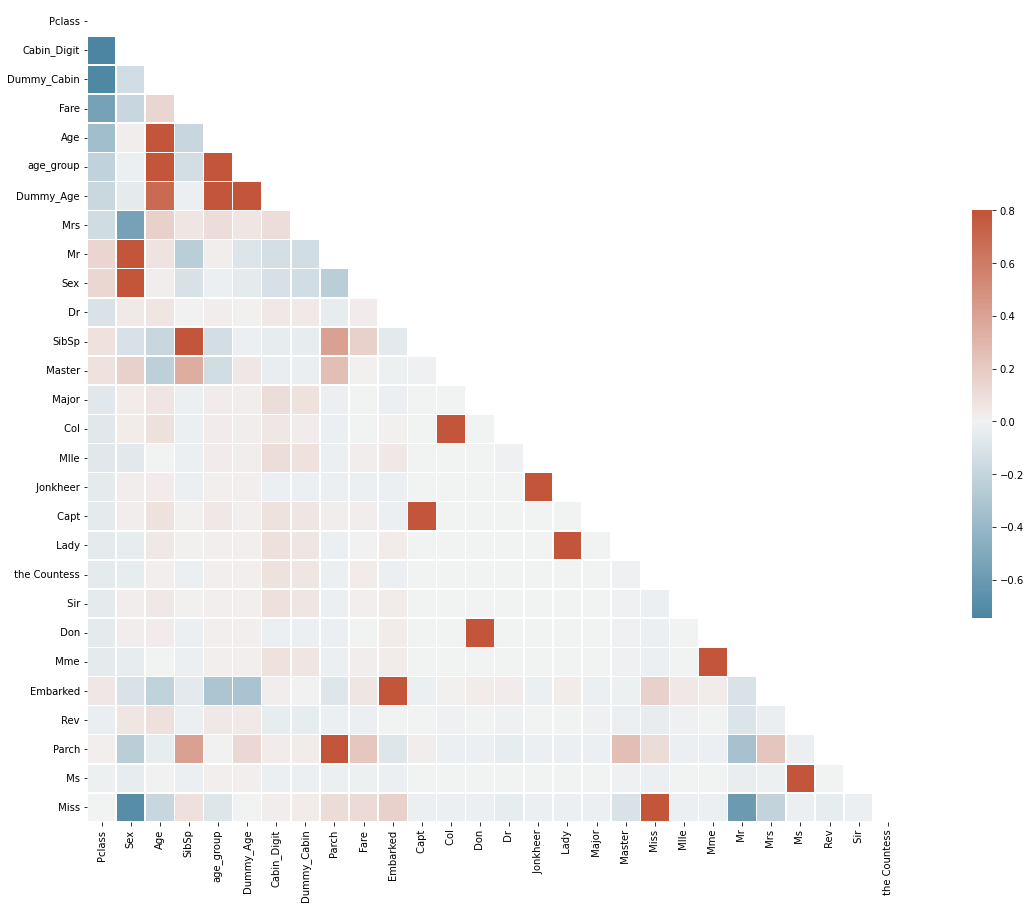

In [ ]:
# Set up the matplotlib figure
f, ax = plt.subplots(figsize=(25, 15))
#sns.heatmap(corrmat, vmax=.8, square=True);

# Generate a mask for the upper triangle
mask = np.triu(np.ones_like(corr_matrix, dtype=bool))

# Generate a custom diverging colormap
cmap = sns.diverging_palette(230, 20, as_cmap=True)

# Draw the heatmap with the mask and correct aspect ratio
sns.heatmap(corr_matrix, mask=mask, cmap=cmap, vmax = 0.8, center=0,
            square=True, linewidths=.5, cbar_kws={"shrink": .5})

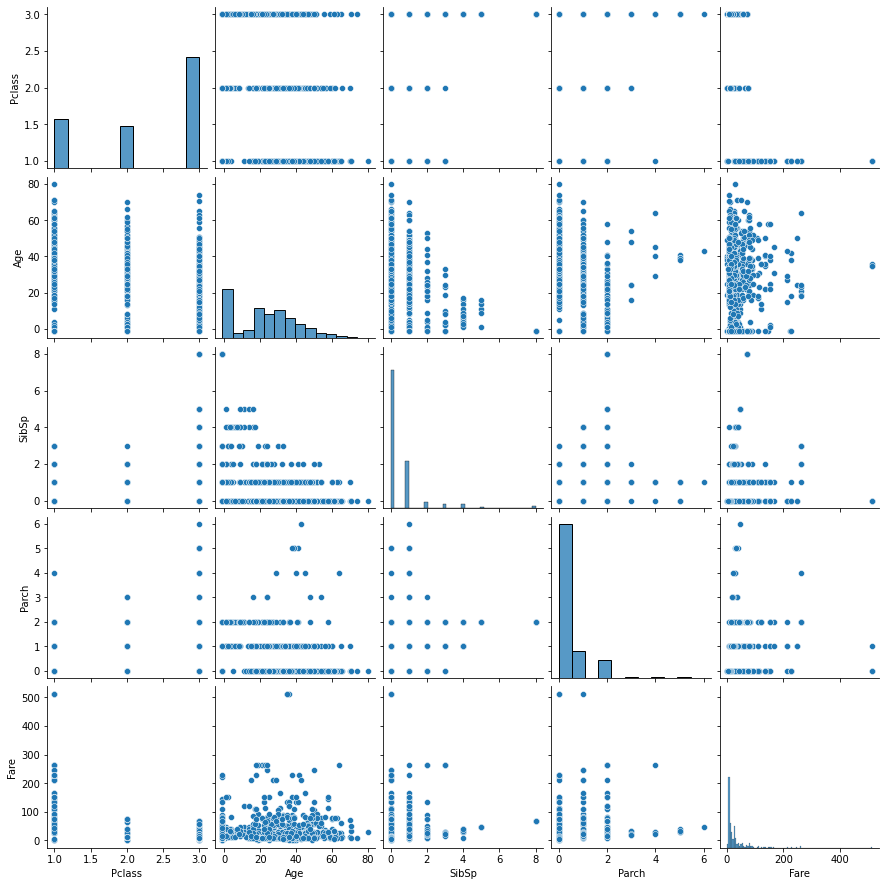

In [ ]:
y_features = ['Pclass', 'Age', 'SibSp', 'Parch','Fare']
features = y_features[1:]

sns.pairplot(df[y_features])

#### Let's take a close look into our dependent variable
 Here we will use Seaborn : https://seaborn.pydata.org/

Text(0.5, 1.0, 'Distribuition of Survieved')

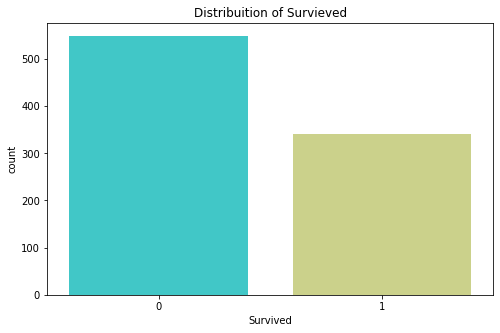

In [ ]:
plt.figure(figsize=(8,5))
sns.countplot(x='Survived',data=titanic_df, palette='rainbow')
plt.title("Distribuition of Survieved")

When analysizing the graph above we can infer that our dependent variable is well balanced. About 300 passangers survived, while a little over 500 did not. 

# Section 6 - Data Visualization

Distribution of age by passenger class

Text(0.5, 1.0, 'Age by Passenger Class')

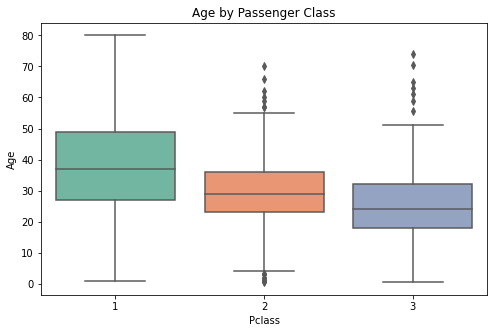

In [ ]:
plt.figure(figsize=(8,5))
sns.boxplot(x='Pclass',y='Age',data=titanic_df, palette='Set2')
plt.title("Age by Passenger Class")

The graph "Age by Passenger Class" iulustrates the idea that people from the first class is relatively older than the other two classes. Also, people who embarked in the thrisd class is, on average, younger than the first and second class.

Age by Passenger Class, Separated by Survival

Text(0.5, 1.0, 'Age by Passenger Class and Survival, Titanic')

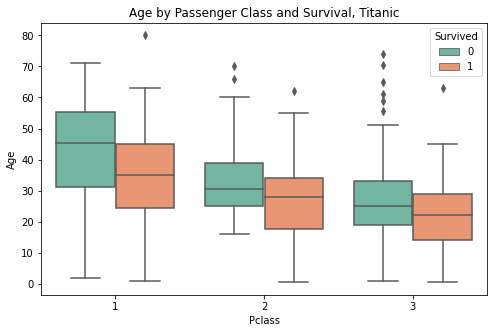

In [ ]:
plt.figure(figsize=(8,5))
sns.boxplot(x='Pclass',y='Age',data=titanic_df, palette='Set2', hue="Survived")
plt.title("Age by Passenger Class and Survival, Titanic")

Text(0.5, 1.0, 'Age by Passenger Class and Survival, Titanic')

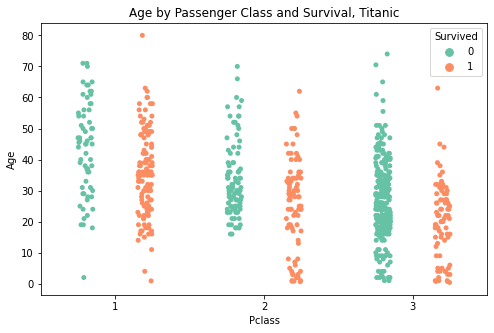

In [ ]:
plt.figure(figsize=(8,5))
sns.stripplot(x='Pclass', y='Age', data=titanic_df, jitter=True, hue='Survived', dodge=True, palette='Set2')
plt.title("Age by Passenger Class and Survival, Titanic")

The two graphs above shows the relation between age, passanger class and survival status. We can see that people who were in the first class were older than second and third class. Also, in all classes people who survived were younger than those who did not. 

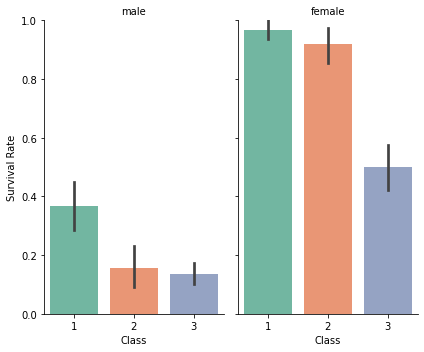

In [ ]:
g = sns.catplot(x='Pclass',y='Survived', col = 'Sex', data=titanic_df,
                kind='bar', aspect=.6, palette='Set2')


(g.set_axis_labels("Class", "Survival Rate")
  .set_titles("{col_name}")
  .set(ylim=(0,1)))


plt.tight_layout()
plt.savefig('seaborn_catplot.png', dpi=1000)

Count of Passengers that Embarked in Each City

In [ ]:
titanic_df.Embarked = titanic_df.replace(
    {"Embarked": {"S": "Southampton", 
             "C": "Cherbourg",
             "Q": "Queenstown",}}                
                  ).Embarked   

Text(0.5, 1.0, 'Count of Passengers that Embarked in Each City')

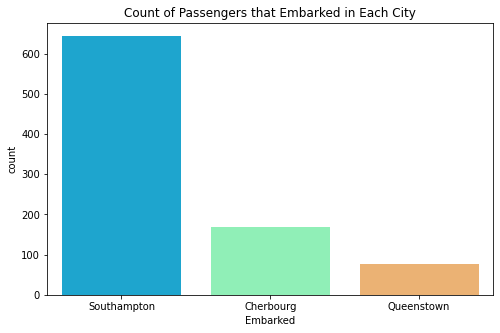

In [ ]:
plt.figure(figsize=(8,5))
sns.countplot(x='Embarked',data=titanic_df, palette='rainbow')
plt.title("Count of Passengers that Embarked in Each City")

Southampton was the location that most people have embarked, with a total surpassing the 600 passengers mark.

\\

Count of Passengers that Survived by Embarked City

Text(0.5, 1.0, 'Count of Passengers that Survived by Embarked City')

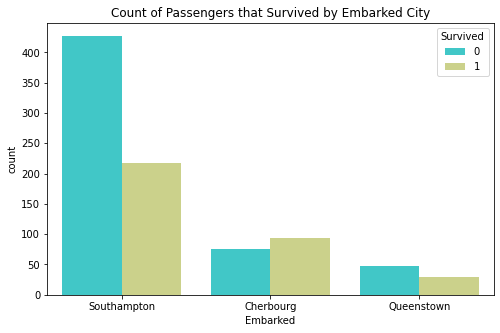

In [ ]:
plt.figure(figsize=(8,5))
sns.countplot(x='Embarked',data=titanic_df, palette='rainbow', hue="Survived")
plt.title("Count of Passengers that Survived by Embarked City")

Most part of those who embarked in Southampton did not survive, gathering this information with what have been exposed in the graph bellow, this can be explanied because the biggest part of those passengers werw allocated in the third class. Also, Chebourg as the only location that passengrs surviver more that died, this can be explained because most part of them were refered to be in the dirst class. 

\\

Count of Passengers that Embarked in Each City by Class

Text(0.5, 1.0, 'Count of Passengers that Embarked in Each City by Class')

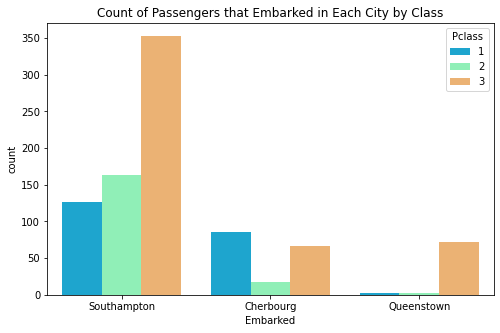

In [ ]:
plt.figure(figsize=(8,5))
sns.countplot(x='Embarked',data=titanic_df, palette='rainbow', hue="Pclass")
plt.title("Count of Passengers that Embarked in Each City by Class")

Cherbourg was the only location in which most passengers who embarked were in the first class

\\

Fare of Passenger by Embarked Town 

Text(0.5, 1.0, 'Fare of Passenger by Embarked Town, Divided by Class')

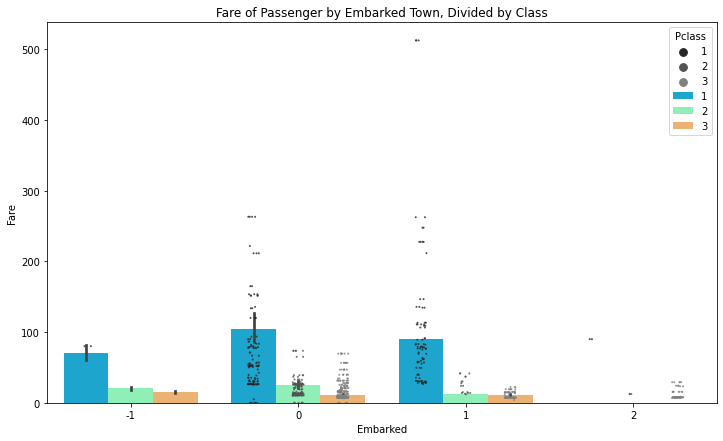

In [ ]:
plt.figure(figsize=(12,7))
sns.barplot(x='Embarked',y='Fare',data=titanic_df, palette='rainbow', hue='Pclass')
sns.stripplot(x='Embarked',y="Fare",data=df, hue='Pclass', dodge='True', color='grey', alpha=.8, s=2)
plt.title("Fare of Passenger by Embarked Town, Divided by Class")

\\

Count of Passengers that Survived by Cabin Digit

In [ ]:
titanic_og = titanic_df

Cabin_Digit = titanic_og['Cabin'].str[0]
titanic_og.insert(5,'Cabin_Digit', Cabin_Digit)

titanic_og.Cabin_Digit = titanic_og.replace(
    {"Cabin_Digit": {"N": -1, 
             "T": 0,
             "G": 1,
             "F": 2,
             "E": 3,
             "D": 4, 
             "C": 5,
             "B": 6,
             "A": 7}}                
                  ).Cabin_Digit 

Text(0.5, 1.0, 'Count of Passengers that Survived by Cabin Digit')

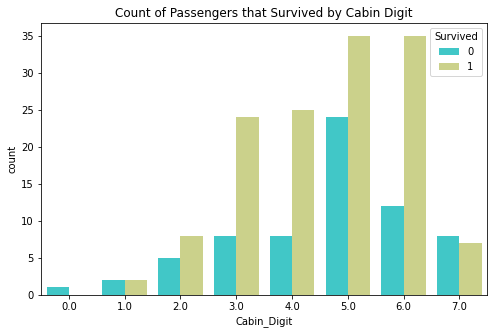

In [ ]:
plt.figure(figsize=(8,5))
sns.countplot(x='Cabin_Digit',data=titanic_og, palette='rainbow', hue="Survived")
plt.title("Count of Passengers that Survived by Cabin Digit") 

Condicional a todos que estao na primeira classe, o percentual de sobrevivencia importa c a idade?

Creating a categorical variable for Age and plotting survival rate by age group

In [ ]:
category = pd.cut(titanic_og.Age, bins=[-1,0,2,17,65,99], labels=["Missing", "Toddler","Child","Adult","Elderly"])
titanic_og.insert(6,'age_group', category)

Text(0.5, 1.0, 'Count of Passengers that Survived by Age Group')

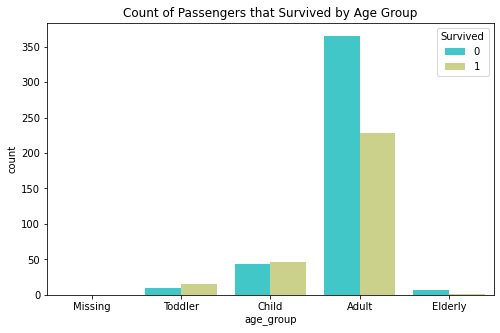

In [ ]:
plt.figure(figsize=(8,5))
sns.countplot(x='age_group',data=titanic_og, palette='rainbow', hue="Survived")
plt.title("Count of Passengers that Survived by Age Group")

# Section 7 - Preparing to use the ML models 

** Loading the test dataset and applying the same data prep and FE

Dividing dataframes in matrices


In [ ]:
df = df.drop(['Name', 'Ticket', 'Cabin', 'Name_title', "Dummy_Cabin","Age","Dummy_Age"], axis=1) 

In [ ]:
X_train = df[:train_df.shape[0]]
X_val = df[:val_df.shape[0]]
X_test = df[:test_df.shape[0]]
y_train = train_df.Survived
y_val = val_df.Survived
y_test = test_df.Survived

In [ ]:
from sklearn.ensemble import RandomForestClassifier

feature_names = [f"feature {i}" for i in range(df.shape[1])]
forest = RandomForestClassifier(random_state=0)
forest.fit(X_train, y_train)


RandomForestClassifier(random_state=0)

In [ ]:
import time
import numpy as np

start_time = time.time()
importances = forest.feature_importances_
std = np.std([tree.feature_importances_ for tree in forest.estimators_], axis=0)
elapsed_time = time.time() - start_time

print(f"Elapsed time to compute the importances: {elapsed_time:.3f} seconds")

Elapsed time to compute the importances: 0.025 seconds


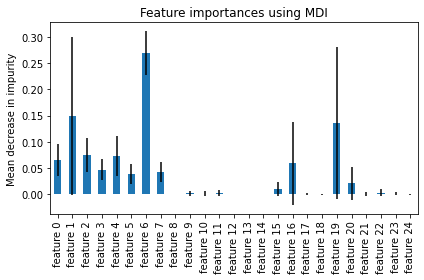

In [ ]:
import pandas as pd

forest_importances = pd.Series(importances, index=feature_names)

fig, ax = plt.subplots()
forest_importances.plot.bar(yerr=std, ax=ax)
ax.set_title("Feature importances using MDI")
ax.set_ylabel("Mean decrease in impurity")
fig.tight_layout()

In [ ]:
df

,Pclass,Sex,SibSp,age_group,Cabin_Digit,Parch,Fare,Embarked,Capt,Col,...,Master,Miss,Mlle,Mme,Mr,Mrs,Ms,Rev,Sir,the Countess
368,3,0,0,-1,-1,0,7.7500,2,0,0,...,0,1,0,0,0,0,0,0,0,0
339,1,1,0,2,0,0,35.5000,0,0,0,...,0,0,0,0,1,0,0,0,0,0
864,2,1,0,2,-1,0,13.0000,0,0,0,...,0,0,0,0,1,0,0,0,0,0
672,2,1,0,3,-1,0,10.5000,0,0,0,...,0,0,0,0,1,0,0,0,0,0
506,2,0,0,2,-1,2,26.0000,0,0,0,...,0,0,0,0,0,1,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
347,3,0,1,-1,-1,0,16.1000,0,0,0,...,0,0,0,0,0,1,0,0,0,0
218,1,0,0,2,4,0,76.2917,1,0,0,...,0,1,0,0,0,0,0,0,0,0
239,2,1,0,2,-1,0,12.2750,0,0,0,...,0,0,0,0,1,0,0,0,0,0
491,3,1,0,2,-1,0,7.2500,0,0,0,...,0,0,0,0,1,0,0,0,0,0


In [ ]:
#from sklearn.inspection import permutation_importance

#start_time = time.time()
#result = permutation_importance(
#    forest, X_test, y_test, n_repeats=10, random_state=42, n_jobs=2
#)
#elapsed_time = time.time() - start_time
#print(f"Elapsed time to compute the importances: {elapsed_time:.3f} seconds")

#forest_importances = pd.Series(result.importances_mean, index=feature_names)

In [ ]:
#fig, ax = plt.subplots()
#forest_importances.plot.bar(yerr=result.importances_std, ax=ax)
#ax.set_title("Feature importances using permutation on full model")
#ax.set_ylabel("Mean accuracy decrease")
#fig.tight_layout()
#plt.show()

In [ ]:
df.head()

,Pclass,Sex,SibSp,age_group,Cabin_Digit,Parch,Fare,Embarked,Capt,Col,...,Master,Miss,Mlle,Mme,Mr,Mrs,Ms,Rev,Sir,the Countess
368,3,0,0,-1,-1,0,7.75,2,0,0,...,0,1,0,0,0,0,0,0,0,0
339,1,1,0,2,0,0,35.50,0,0,0,...,0,0,0,0,1,0,0,0,0,0
864,2,1,0,2,-1,0,13.00,0,0,0,...,0,0,0,0,1,0,0,0,0,0
672,2,1,0,3,-1,0,10.50,0,0,0,...,0,0,0,0,1,0,0,0,0,0
506,2,0,0,2,-1,2,26.00,0,0,0,...,0,0,0,0,0,1,0,0,0,0


Filtering important features

In [ ]:
X_train.shape

(436, 25)

In [ ]:
X_val.shape

(187, 25)

In [ ]:
X_test.shape

(268, 25)

In [ ]:
y_train.shape

(436,)

In [ ]:
y_val.shape

(187,)

In [ ]:
y_test.shape

(268,)

In [ ]:
features = ["Pclass", "Sex", "SibSp", "age_group", "Cabin_Digit","Parch","Fare","Embarked"]

X_train = X_train[features]

In [ ]:
X_train

,Pclass,Sex,SibSp,age_group,Cabin_Digit,Parch,Fare,Embarked
368,3,0,0,-1,-1,0,7.7500,2
339,1,1,0,2,0,0,35.5000,0
864,2,1,0,2,-1,0,13.0000,0
672,2,1,0,3,-1,0,10.5000,0
506,2,0,0,2,-1,2,26.0000,0
...,...,...,...,...,...,...,...,...
137,1,1,1,2,5,0,53.1000,0
647,1,1,0,2,7,0,35.5000,1
631,3,1,0,2,-1,0,7.0542,0
90,3,1,0,2,-1,0,8.0500,0


In [ ]:
X_train

,Pclass,Sex,SibSp,age_group,Cabin_Digit,Parch,Fare,Embarked
368,3,0,0,-1,-1,0,7.7500,2
339,1,1,0,2,0,0,35.5000,0
864,2,1,0,2,-1,0,13.0000,0
672,2,1,0,3,-1,0,10.5000,0
506,2,0,0,2,-1,2,26.0000,0
...,...,...,...,...,...,...,...,...
137,1,1,1,2,5,0,53.1000,0
647,1,1,0,2,7,0,35.5000,1
631,3,1,0,2,-1,0,7.0542,0
90,3,1,0,2,-1,0,8.0500,0


In [ ]:
X_test = X_test[features]

In [ ]:
X_test

,Pclass,Sex,SibSp,age_group,Cabin_Digit,Parch,Fare,Embarked
368,3,0,0,-1,-1,0,7.7500,2
339,1,1,0,2,0,0,35.5000,0
864,2,1,0,2,-1,0,13.0000,0
672,2,1,0,3,-1,0,10.5000,0
506,2,0,0,2,-1,2,26.0000,0
...,...,...,...,...,...,...,...,...
382,3,1,0,2,-1,0,7.9250,0
657,3,0,1,2,-1,1,15.5000,2
611,3,1,0,-1,-1,0,7.0500,0
599,1,1,1,2,7,0,56.9292,1


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 891 entries, 368 to 872
Data columns (total 25 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Pclass         891 non-null    int64  
 1   Sex            891 non-null    int64  
 2   SibSp          891 non-null    int64  
 3   age_group      891 non-null    int64  
 4   Cabin_Digit    891 non-null    int64  
 5   Parch          891 non-null    int64  
 6   Fare           891 non-null    float64
 7   Embarked       891 non-null    int64  
 8    Capt          891 non-null    uint8  
 9    Col           891 non-null    uint8  
 10   Don           891 non-null    uint8  
 11   Dr            891 non-null    uint8  
 12   Jonkheer      891 non-null    uint8  
 13   Lady          891 non-null    uint8  
 14   Major         891 non-null    uint8  
 15   Master        891 non-null    uint8  
 16   Miss          891 non-null    uint8  
 17   Mlle          891 non-null    uint8  
 18   Mme    

# Section 8 - Decision Tree 

In [ ]:
#Scikit
from sklearn.tree import DecisionTreeClassifier
#from sklearn.ensemble import BaggingRegressor, RandomForestRegressor, AdaBoostRegressor, GradientBoostingRegressor
from sklearn.metrics import accuracy_score, confusion_matrix
from sklearn import metrics

import warnings
warnings.simplefilter('ignore')

In [ ]:
#accuracy = pd.DataFrame({'Decision Tree': accuracy_score(y_test, pred_dtc),
#                    'Decision Tree no prune': accuracy_score(y_class_test,pred_dtc_noprune) },
#                    index=[0]                    )

#accuracy

In [ ]:
# Grow tree without prunning
#dtr_noprune = sk_tree.DecisionTreeRegressor().fit(X_train,y_train)

# Plot!
#dot_data = sk_tree.export_graphviz(dtr_noprune, out_file=None, 
#                     filled=True, rounded=True,
#                     feature_names = features) 

#graph = graphviz.Source(dot_data) 
#graph

In [ ]:
#pred_dtr_noprune = dtr_noprune.predict(X_test)

In [ ]:
#accuracy.loc['No Prune'] = [explained_variance_score(y_test, pred_dtr_noprune),
#                            mean_absolute_error(y_test,pred_dtr_noprune) ,
#                            median_absolute_error(y_test, pred_dtr_noprune),
#                            r2_score(y_test,pred_dtr_noprune)]

In [ ]:
# 3) Predict Naive

#y_pred_dtc = dtc.predict(X_test)
#pred_dtc_noprune = dtc_noprune.predict(X_test)
#cm_dtc = confusion_matrix(y_test, y_pred_dtc)



#accuracy = pd.DataFrame({'Decision Tree': accuracy_score(y_test, pred_dtc),
                    #'Decision Tree no prune': accuracy_score(y_test,pred_dtc_noprune) },
                    #index=[0]                    )

#accuracy

#print("Accuracy", metrics.accuracy_score(y_test, y_pred_dtc))

## PCA --> https://www.projectpro.io/recipes/optimize-hyper-parameters-of-decisiontree-model-using-grid-search-in-python
## Principal componente seria overall quality 

Adding depth to the trees

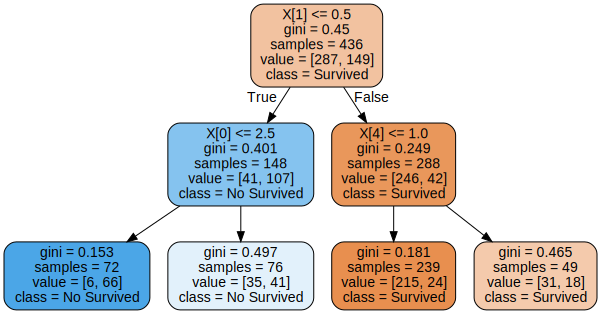

In [ ]:
dtc = sk_tree.DecisionTreeClassifier(max_depth = 2) # after we tested for the hyperparameters 
dtc_noprune = sk_tree.DecisionTreeClassifier()

dtc.fit(X_train, y_train)
dtc_noprune.fit(X_train, y_train)

dot_data = sk_tree.export_graphviz(dtc, out_file=None, 
                     class_names = ['Survived', 'No Survived'],
                     filled=True, rounded=True) 

graph = graphviz.Source(dot_data) 
graph

In [ ]:
# 3) Predict

y_pred_dtc = dtc.predict(X_test)
#pred_dtc_noprune = dtc_noprune.predict(X_test)
cm_dtc = confusion_matrix(y_test, y_pred_dtc)



#accuracy = pd.DataFrame({'Decision Tree': accuracy_score(y_test, pred_dtc),
                    #'Decision Tree no prune': accuracy_score(y_test,pred_dtc_noprune) },
                    #index=[0]                    )

#accuracy

print("Accuracy", metrics.accuracy_score(y_test, y_pred_dtc))

## PCA --> https://www.projectpro.io/recipes/optimize-hyper-parameters-of-decisiontree-model-using-grid-search-in-python
## Principal componente seria overall quality 

Accuracy 0.48507462686567165


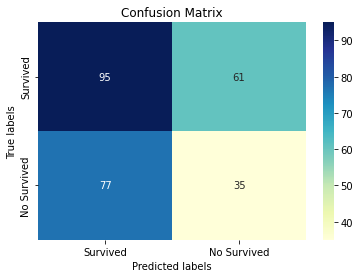

In [ ]:
# Now, lets check our Confusion Matrix for Decision Tree  

labels = ["Survived", "No Survived"]

ax= plt.subplot()
sns.heatmap(cm_dtc, annot=True, fmt='g', ax=ax, cmap="YlGnBu"); 
# labels, title and ticks
ax.set_xlabel('Predicted labels');ax.set_ylabel('True labels'); 
ax.set_title('Confusion Matrix'); 
ax.xaxis.set_ticklabels(labels); ax.yaxis.set_ticklabels(labels);

![](https://drive.google.com/1zlIfOMv8igLfOaT1tTzftXVXtnrR8WRz)

In [ ]:
# To optimize the hyperparameters 

# We got insights from: 
# 1. https://www.projectpro.io/recipes/optimize-hyper-parameters-of-decisiontree-model-using-grid-search-in-python
# 2. https://www.analyticsvidhya.com/blog/2020/11/hyperparameter-tuning-using-optuna/ 

# From link 1:

from sklearn import decomposition, datasets
from sklearn import tree
from sklearn.pipeline import Pipeline
from sklearn.model_selection import GridSearchCV
from sklearn.preprocessing import StandardScaler

In [ ]:
std_slc = StandardScaler()

In [ ]:
pca = decomposition.PCA()

In [ ]:
dec_tree = tree.DecisionTreeClassifier()

In [ ]:
 pipe = Pipeline(steps=[('std_slc', std_slc),
                           ('pca', pca),
                           ('dec_tree', dec_tree)])

In [ ]:
n_components = list(range(1,X_train.shape[1]+1,1))

In [ ]:
criterion = ['gini','entropy']
max_depth= [2,4,6,8,10,12]

In [ ]:
parameters = dict(pca__n_components=n_components,
                      dec_tree__criterion=criterion,
                      dec_tree__max_depth=max_depth)


In [ ]:
clf_GS = GridSearchCV(pipe, parameters)
clf_GS.fit(X_train, y_train)

GridSearchCV(estimator=Pipeline(steps=[('std_slc', StandardScaler()),
                                       ('pca', PCA()),
                                       ('dec_tree', DecisionTreeClassifier())]),
             param_grid={'dec_tree__criterion': ['gini', 'entropy'],
                         'dec_tree__max_depth': [2, 4, 6, 8, 10, 12],
                         'pca__n_components': [1, 2, 3, 4, 5, 6, 7, 8]})

In [ ]:
print('Best Criterion:', clf_GS.best_estimator_.get_params()['dec_tree__criterion'])
print('Best max_depth:', clf_GS.best_estimator_.get_params()['dec_tree__max_depth'])
print('Best Number Of Components:', clf_GS.best_estimator_.get_params()['pca__n_components'])
print(); print(clf_GS.best_estimator_.get_params()['dec_tree'])

Best Criterion: entropy
Best max_depth: 2
Best Number Of Components: 4

DecisionTreeClassifier(criterion='entropy', max_depth=2)


In [ ]:
#y_class_train = pd.qcut(y_train,q = 2, labels = ["0", "1"],duplicates='drop')
#y_class_test = pd.qcut(y_test,q = 2, labels = ["0", "1"])

#y_class_train.value_counts()

In [ ]:
# Retirado do https://towardsdatascience.com/an-exhaustive-guide-to-classification-using-decision-trees-8d472e77223f 
#clf_en = DecisionTreeClassifier(criterion='entropy', max_depth=3, random_state=0)
#clf_en.fit(X_train, y_train)
#y_pred_en = clf_en.predict(X_test)

In [ ]:
#def mean_absolute_percentage_error(y_true, y_pred): 
#    y_true, y_pred = np.array(y_true), np.array(y_pred)
#    return np.mean(np.abs((y_true - y_pred) / y_true)) * 100

# Section 9 - Random Forest

** Otimizacao de hiperparametro (m_try, )

In [ ]:
# From: https://www.geeksforgeeks.org/random-forest-classifier-using-scikit-learn/

from sklearn.ensemble import RandomForestClassifier

clf = RandomForestClassifier(n_estimators = 100) 
 
# Training the model on the training dataset
# fit function is used to train the model using the training sets as parameters
clf.fit(X_train, y_train)
 
# performing predictions on the test dataset
y_pred_rf = clf.predict(X_test)
 
# using metrics module for accuracy calculation
print("Accuracy", metrics.accuracy_score(y_test, y_pred_rf))

# confusion matrix
cm_rf = confusion_matrix(y_test, y_pred_rf)

Accuracy 0.4962686567164179


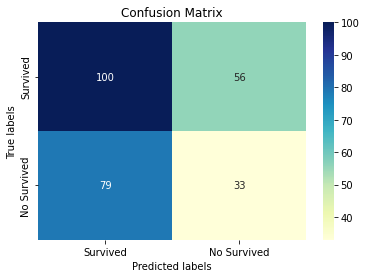

In [ ]:
# Now, lets check our Confusion Matrix for Random Forest

labels = ["Survived", "No Survived"]

ax= plt.subplot()
sns.heatmap(cm_rf, annot=True, fmt='g', ax=ax, cmap="YlGnBu"); 
# labels, title and ticks
ax.set_xlabel('Predicted labels');ax.set_ylabel('True labels'); 
ax.set_title('Confusion Matrix'); 
ax.xaxis.set_ticklabels(labels); ax.yaxis.set_ticklabels(labels);

# Section 10 - AdaBoost

In [ ]:
from sklearn.ensemble import AdaBoostClassifier

In [ ]:
# From:https://www.datacamp.com/tutorial/adaboost-classifier-python

# Create adaboost classifer object
abc = AdaBoostClassifier(n_estimators=50,
                         learning_rate=1)
# Train Adaboost Classifer
model = abc.fit(X_train, y_train)

#Predict the response for test dataset
y_pred_adb = model.predict(X_test)

In [ ]:
# Computing model accuracy
print("Accuracy:",metrics.accuracy_score(y_test, y_pred_adb))

Accuracy: 0.47761194029850745


In [ ]:
# Confusion Matrix
cm_adb = confusion_matrix(y_test, y_pred_adb)

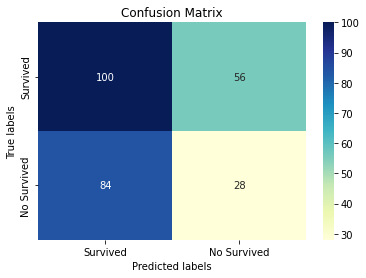

In [ ]:
# Now, lets check our Confusion Matrix for AdaBoost

labels = ["Survived", "No Survived"]

ax= plt.subplot()
sns.heatmap(cm_adb, annot=True, fmt='g', ax=ax, cmap="YlGnBu"); 
# labels, title and ticks
ax.set_xlabel('Predicted labels');ax.set_ylabel('True labels'); 
ax.set_title('Confusion Matrix'); 
ax.xaxis.set_ticklabels(labels); ax.yaxis.set_ticklabels(labels);

ADD LOGISTIC REGRESSION 

TENTAR CHEGAR NA ACURACIA DE +75%